[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/populationcodes/random-matrix-gallery/HEAD?urlpath=%2Fdoc%2Ftree%2Fensembles%2FnonHermitianWishart.ipynb)

In [1]:
import plot
import utils

import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./presentation.mplstyle')

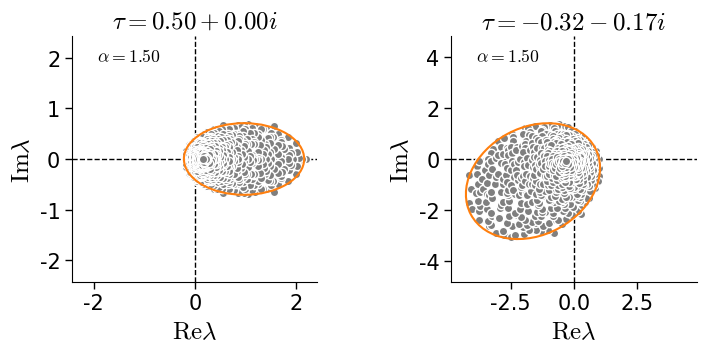

In [11]:
utils.init_randomness(5)

N = 500
P = 750
alpha = P/N
tau = 0.5

fig, s = plt.subplots(1, 2, figsize=(4*2, 4))
cx = s[0]
mu=np.array([0/N, 0/N])
V = utils.sample_2d_real(N, P, tau, mu).astype('complex')
assert V.shape == (N*P, 2)
s1 = np.std(V[:, 0])*math.sqrt(N)
s2 = np.std(V[:, 1])*math.sqrt(N)
tau = np.corrcoef(V.T)[0, 1]

R0 = V[:,0].reshape(N, P)
R1 = V[:,1].reshape(N, P)
X = R0@np.conj(R1.T)
z = np.linalg.eigvals(X)
plot.show_complex_spectrum(cx, z, [s1*s2*np.sqrt(alpha)*(1+np.abs(tau)**2), s1*s2*np.sqrt(alpha)*(1-np.abs(tau)**2)], 
                           center=[s1*s2*np.real(tau)*(1+alpha), s1*s2*np.imag(tau)*(1+alpha)], rotation=tau)
plot.text(cx, 0.1, 0.9, '$\\alpha=%1.2f$'%alpha, fontsize='xx-small')
cx.set_title('$\\tau=%1.2f%+1.2fi$'%(np.real(tau), np.imag(tau)))

cx = s[1]
mu = np.zeros(4)
V = utils.sample_2d_complex(N, P, mu).astype('complex')
assert V.shape == (N*P, 2)
s1 = np.std(V[:, 0])*math.sqrt(N)
s2 = np.std(V[:, 1])*math.sqrt(N)
tau = np.corrcoef(V.T)[0, 1]

R0 = V[:,0].reshape(N, P)
R1 = V[:,1].reshape(N, P)
X = R0@np.conj(R1.T)
z = np.linalg.eigvals(X)
plot.show_complex_spectrum(cx, z, [s1*s2*np.sqrt(alpha)*(1+np.abs(tau)**2), s1*s2*np.sqrt(alpha)*(1-np.abs(tau)**2)], 
                           center=[s1*s2*np.real(tau)*(1+alpha), s1*s2*np.imag(tau)*(1+alpha)], rotation=tau)
plot.text(cx, 0.1, 0.9, '$\\alpha=%1.2f$'%alpha, fontsize='xx-small')
cx.set_title('$\\tau=%1.2f%+1.2fi$'%(np.real(tau), np.imag(tau)))

name = utils.get_script_name()
if name is not None:
    fig.savefig("../images/%s.png"%name)
plt.show()

C:\Users\urico\AppData\Local\Temp\ipykernel_13756\1482234240.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  cx.set_title('$\\tau=%1.2f$'%tau)


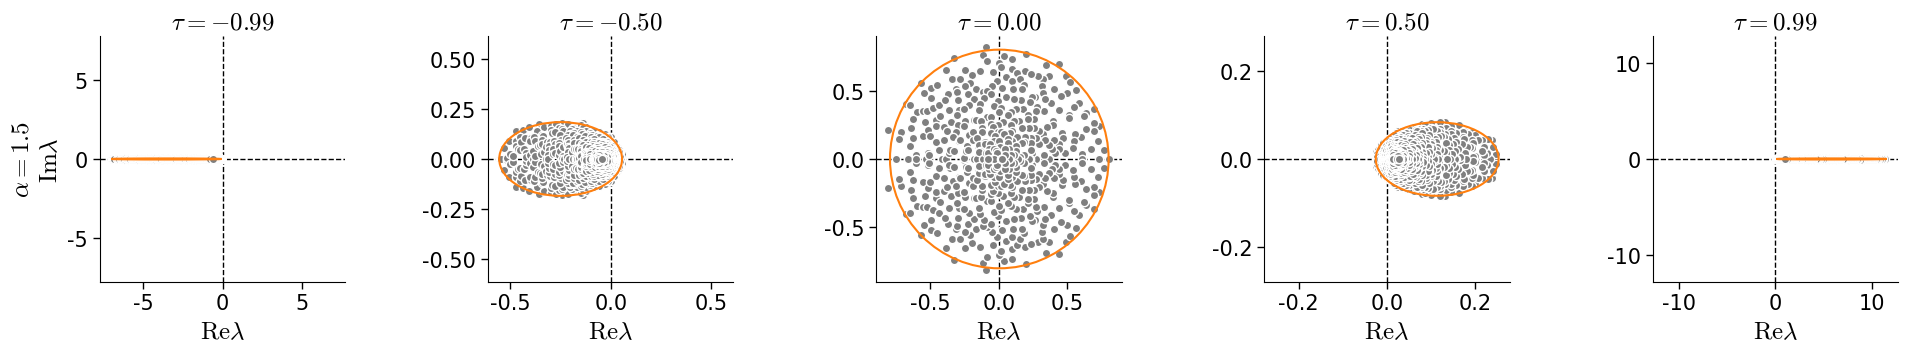

In [3]:
ALPHA = np.random.rand()*2
TAUs = [-0.99, -0.5, 0, 0.5, 0.99]
fig, s = plt.subplots(1, len(TAUs), figsize=(4*len(TAUs), 4))
for i in range(len(TAUs)):
    tau = TAUs[i]
    N = 500
    P = int(ALPHA*N)
    alpha = P/N
    mu=np.array([0/N, 0/N])
    V = utils.sample_2d_real(N, P, tau, mu).astype('complex')
    s1 = np.std(V[:, 0])*math.sqrt(N)
    s2 = np.std(V[:, 1])*math.sqrt(N)
    tau = np.corrcoef(V.T)[0, 1]

    assert V.shape == (N*P, 2)

    R0 = V[:,0].reshape(N, P)
    R1 = V[:,1].reshape(N, P)
    X = R0@np.conj(R1.T)
    z = np.linalg.eigvals(X)

    cx = s[i]
    plot.show_complex_spectrum(cx, z, [s1*s2*np.sqrt(alpha)*(1+np.abs(tau)**2), s1*s2*np.sqrt(alpha)*(1-np.abs(tau)**2)], 
                               center=[s1*s2*np.real(tau)*(1+alpha), s1*s2*np.imag(tau)*(1+alpha)], rotation=tau)
    cx.set_title('$\\tau=%1.2f$'%tau)

    if i == 0:
        cx.set_ylabel('$\\alpha=%1.1f$\n$\\mathrm{Im}\\lambda$'%alpha)
    else:
        cx.set_ylabel('')

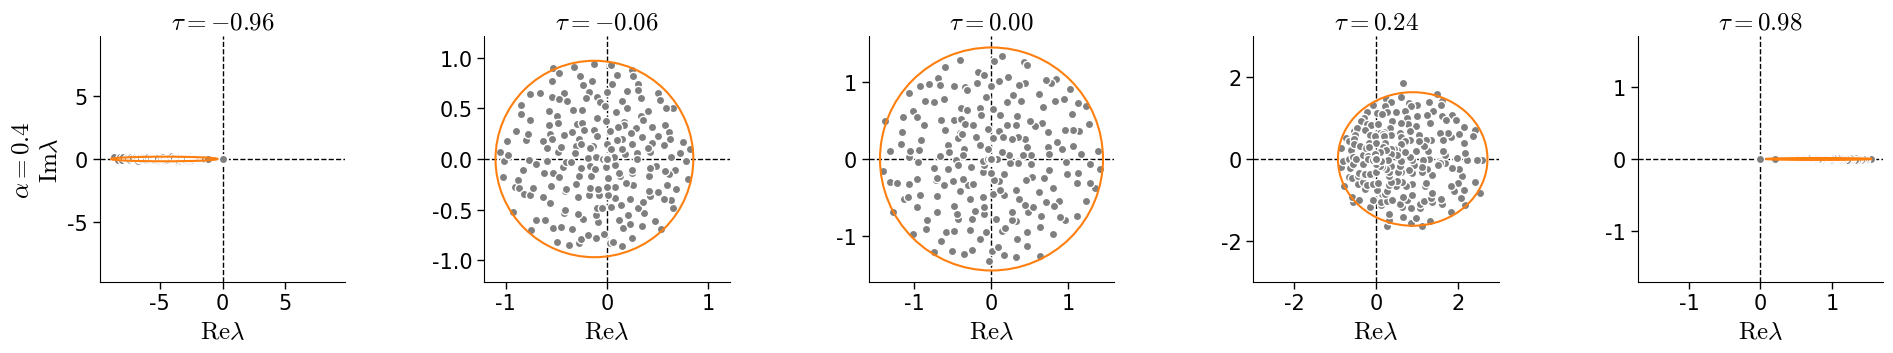

In [4]:
ALPHA = np.random.rand()*2
TAUs = [-0.99, -0.5, 0, 0.5, 0.99]
fig, s = plt.subplots(1, len(TAUs), figsize=(4*len(TAUs), 4))
for i in range(len(TAUs)):
    tau = TAUs[i]
    N = 500
    P = int(ALPHA*N)
    alpha = P/N
    mu=np.array([0/N, 0/N])
    if True:
        # Independent real and imaginary parts, not identically distributed
        V, covs = utils.sample_2d_indepeddent_complex(N, P, tau, mu)
        s1 = np.sqrt(N*covs[0,0])
        s2 = np.sqrt(N*covs[1,1])
        tau = N*covs[1,0]/(s1*s2)
    else:
        # Independent and identically distributed real and imaginary parts
        s1 = np.random.rand()*2
        s2 = np.random.rand()*2
        covs = np.array([[s1**2/N, s1*s2*tau/N], [s1*s2*tau/N, s2**2/N]])
        Vr = np.random.multivariate_normal(mu, covs/2, N*P).astype('complex')
        Vi = np.random.multivariate_normal(mu, covs/2, N*P).astype('complex')
        V = Vr + 1j*Vi

    assert V.shape == (N*P, 2)

    R0 = V[:,0].reshape(N, P)
    R1 = V[:,1].reshape(N, P)
    X = R0@np.conj(R1.T)
    z = np.linalg.eigvals(X)

    cx = s[i]
    plot.show_complex_spectrum(cx, z, [s1*s2*np.sqrt(alpha)*(1+np.abs(tau)**2), s1*s2*np.sqrt(alpha)*(1-np.abs(tau)**2)], 
                               center=[s1*s2*np.real(tau)*(1+alpha), s1*s2*np.imag(tau)*(1+alpha)], rotation=tau)
    cx.set_title('$\\tau=%1.2f$'%tau)

    if i == 0:
        cx.set_ylabel('$\\alpha=%1.1f$\n$\\mathrm{Im}\\lambda$'%alpha)
    else:
        cx.set_ylabel('')

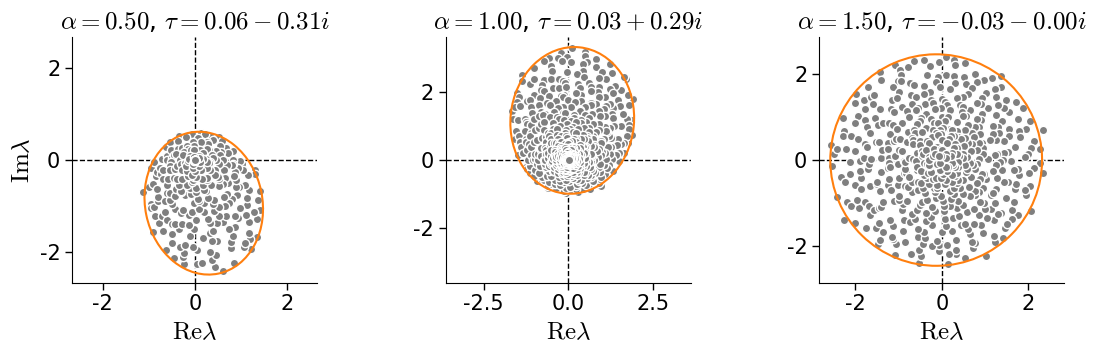

In [5]:
ALPHAs = [0.5, 1, 1.5]
fig, s = plt.subplots(1, len(ALPHAs), figsize=(4*len(ALPHAs), 4))
for i in range(len(ALPHAs)):
    N = 500
    P = int(ALPHAs[i]*N)
    alpha = P/N

    mu = np.zeros(4)
    V = utils.sample_2d_complex(N, P, mu).astype('complex')
    assert V.shape == (N*P, 2)
    s1 = np.std(V[:, 0])*math.sqrt(N)
    s2 = np.std(V[:, 1])*math.sqrt(N)
    tau = np.corrcoef(V.T)[0, 1]
    assert V.shape == (N*P, 2)

    R0 = V[:,0].reshape(N, P)
    R1 = V[:,1].reshape(N, P)
    X = R0@np.conj(R1.T)
    z = np.linalg.eigvals(X)

    cx = s[i]
    plot.show_complex_spectrum(cx, z, [s1*s2*np.sqrt(alpha)*(1+np.abs(tau)**2), s1*s2*np.sqrt(alpha)*(1-np.abs(tau)**2)], 
                               center=[s1*s2*np.real(tau)*(1+alpha), s1*s2*np.imag(tau)*(1+alpha)], rotation=tau)
    cx.set_title('$\\alpha=%1.2f$'%alpha + ', $\\tau=%1.2f%+1.2fi$'%(np.real(tau), np.imag(tau)))

    if i == 0:
        cx.set_ylabel('$\\mathrm{Im}\\lambda$')
    else:
        cx.set_ylabel('')